In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import pandas as pd

try:
    base = Path(__file__).resolve().parent.parent
except NameError:
    base = Path.cwd().parent.parent  # if running interactively inside si_figures/

df_maxs = pd.read_csv(base / 'data' / 'df_maxs.csv')


3988.483211620178
1449.7119459294042


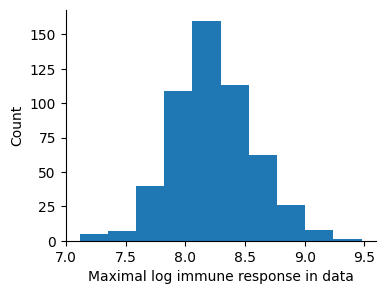

In [2]:
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(np.log(df_maxs['Immune.Intensity']))
print(np.mean(df_maxs['Immune.Intensity']))
print(df_maxs['Immune.Intensity'].std())
ax.set_xlabel('Maximal log immune response in data')
ax.set_ylabel('Count')
ax.spines[['top','right']].set_visible(False)
fig.savefig('Imax_data_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('Imax_data_dist.pdf',dpi = 600,bbox_inches = 'tight')


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9252497212878533
0.3052617431327687


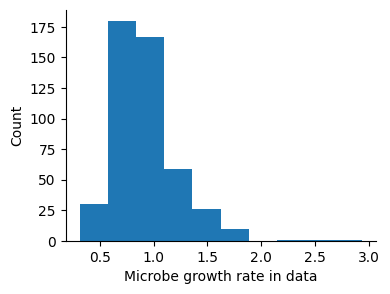

In [3]:
try:
    base = Path(__file__).resolve().parent.parent
except NameError:
    base = Path.cwd().parent.parent  # if running interactively inside si_figures/

df = pd.read_csv(base / 'data' / 'data_raw' / 'raw_phenotype-4.csv')
groups = df.groupby('Number')
d_parasitemias = []
for group_name,group_df in df.groupby('Number'):
    #print(group_df)
    group_df = group_df[group_df['Day']<=8]

    d_parasitemia = np.log(group_df['Parasitemia']).diff()
    d_parasitemia = d_parasitemia[d_parasitemia>0]
    d_parasitemia = d_parasitemia[d_parasitemia<np.inf]
    #print(d_parasitemia)
    d_parasitemias.append(d_parasitemia.mean())
d_parasitemias = np.array(d_parasitemias)[~np.isnan(d_parasitemias)]
fig,ax = plt.subplots(figsize = (4,3))

ax.hist(d_parasitemias)
print(np.mean(d_parasitemias[d_parasitemias!=np.nan]))
print(np.std(d_parasitemias[d_parasitemias!=np.nan]))
ax.set_xlabel('Microbe growth rate in data')
ax.set_ylabel('Count')

ax.spines[['top','right']].set_visible(False)
fig.savefig('a_data_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('a_data_dist.pdf',dpi = 600,bbox_inches = 'tight')


0.7762491909385113
0.47006674677750876


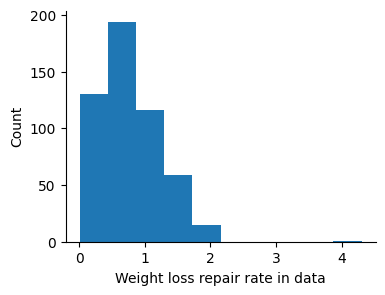

In [4]:
d_weights = []
for group_name,group_df in df.groupby('Number'):
    #print(group_df)
    group_df = group_df[group_df['Day']<=8]

    d_weight = group_df['Weight'].diff()
    d_weight = d_weight[d_weight<0]
    d_weight = d_weight[d_weight<np.inf]
    #print(d_parasitemia)
    d_weights.append(d_weight.mean())
fig,ax = plt.subplots(figsize = (4,3))

d_weights = abs(np.array(d_weights)[~np.isnan(d_weights)])
ax.hist(d_weights)
ax.set_xlabel('Weight loss repair rate in data')
ax.set_ylabel('Count')

ax.spines[['top','right']].set_visible(False)
fig.savefig('rD_weight_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('rD_weight_dist.pdf',dpi = 600,bbox_inches = 'tight')
print(d_weights.mean())
print(d_weights.std())

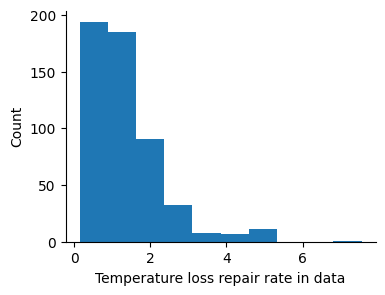

In [5]:
d_temps = []
for group_name,group_df in df.groupby('Number'):
    #print(group_df)
    group_df = group_df[group_df['Day']<=8]

    d_temp = group_df['Temperature'].diff()
    d_temp = d_temp[d_temp<0]
    d_temp = d_temp[d_temp<np.inf]
    #print(d_parasitemia)
    d_temps.append(d_temp.mean())
fig,ax = plt.subplots(figsize = (4,3))

d_temps = abs(np.array(d_temps)[~np.isnan(d_temps)])
ax.hist(d_temps)
ax.set_xlabel('Temperature loss repair rate in data')
ax.set_ylabel('Count')

ax.spines[['top','right']].set_visible(False)
fig.savefig('rD_temp_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('rD_temp_dist.pdf',dpi = 600,bbox_inches = 'tight')


1.6752165725047081


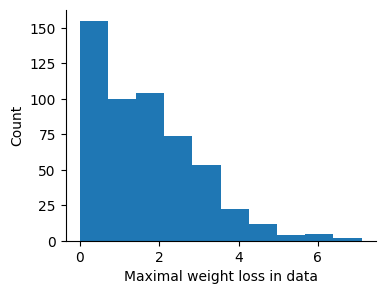

In [6]:
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(df_maxs['Max.Weight.Delta'])
ax.set_xlabel('Maximal weight loss in data')
ax.set_ylabel('Count')
ax.spines[['top','right']].set_visible(False)
fig.savefig('D_max_weight_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('D_max_weight_dist.pdf',dpi = 600,bbox_inches = 'tight')
print(df_maxs['Max.Weight.Delta'].mean())

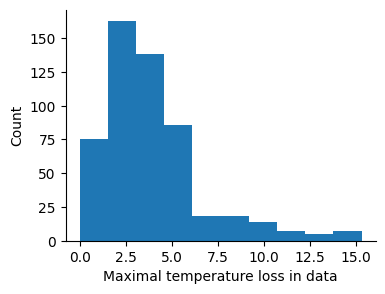

In [7]:
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(df_maxs['Max.Temp.Delta'])
ax.set_xlabel('Maximal temperature loss in data')
ax.set_ylabel('Count')
ax.spines[['top','right']].set_visible(False)
fig.savefig('D_max_temp_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('D_max_temp_dist.pdf',dpi = 600,bbox_inches = 'tight')


0.2896741168210923


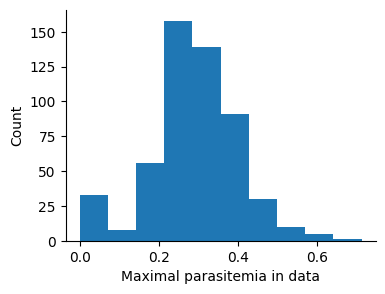

In [8]:
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(df_maxs['Max.Parasitemia'])
ax.set_xlabel('Maximal parasitemia in data')
ax.set_ylabel('Count')
ax.spines[['top','right']].set_visible(False)
fig.savefig('max_parasitemia_dist.png',dpi = 600,bbox_inches = 'tight')
fig.savefig('max_parasitemia_dist.pdf',dpi = 600,bbox_inches = 'tight')
print(df_maxs['Max.Parasitemia'].mean())